# Filtro de Datos
- loc, iloc
- Condiciones de Filtrado de datos simples y múltiples

## Código anterior

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M16 - Data Massaging 1')

df = pd.read_csv('netflix_titles.csv')
df["duration_num"] = df["duration"]
df["duration_unit"] = ""

stringcols = df.select_dtypes(include="object").columns
df[stringcols] = df[stringcols].fillna("").astype(pd.StringDtype())

df["duration_unit"] = "min"

df["duration_unit"] = df["duration_unit"].where(df.duration_num.str.endswith("min"), "season")

df["duration_num"] = df["duration_num"].replace({" min": "", " Season": "", " Seasons": "", "s": ""}, regex=True)

df["duration_num"] = pd.to_numeric(df["duration_num"])

df.at[5541, "duration_unit"] = "min"
df.at[5794, "duration_unit"] = "min"
df.at[5813, "duration_unit"] = "min"

df.at[5541, "duration_num"] = 74
df.at[5794, "duration_num"] = 84
df.at[5813, "duration_num"] = 66

df.at[5541, "duration"] = "74 min"
df.at[5794, "duration"] = "84 min"
df.at[5813, "duration"] = "66 min"

In [2]:
# Quiero saber el total de películas
df.shape[0]

8807

In [3]:
# Se buscan las películas de más de dos horas usando loc
df[['title', 'country', 'release_year', 'duration']].loc[df['duration_num'] > 120]

,title,country,release_year,duration
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min
12,Je Suis Karl,"Germany, Czech Republic",2021,127 min
22,Avvai Shanmughi,,1996,161 min
24,Jeans,India,1998,166 min
26,Minsara Kanavu,,1997,147 min
...,...,...,...,...
8772,Yamla Pagla Deewana 2,India,2013,147 min
8773,Yanda Kartavya Aahe,India,2006,151 min
8788,You Carry Me,"Croatia, Slovenia, Serbia, Montenegro",2015,157 min
8798,Zed Plus,India,2014,131 min


In [4]:
df[['title', 'country', 'release_year', 'duration']].loc[(df['release_year'] == 1989)] # Películas de 1989

,title,country,release_year,duration
139,Do the Right Thing,United States,1989,120 min
603,The Karate Kid Part III,United States,1989,112 min
928,Best of the Best,United States,1989,97 min
1761,Little Monsters,United States,1989,102 min
2366,Alexandria: Again and Forever,"France, Egypt",1989,109 min
4233,Bill Hicks: Sane Man,United States,1989,81 min
4554,Parrot Sketch Not Included: Twenty Years of Mo...,United Kingdom,1989,72 min
5304,Mujrim,India,1989,163 min
5948,The Ryan White Story,United States,1989,94 min
6013,300 Miles to Heaven,"Denmark, France, Poland",1989,93 min


In [5]:
# Múltiples condiciones: películas de 1989 de India
df[['title', 'country', 'release_year', 'duration']].loc[(df['release_year'] == 1989) & (df['country'] == 'India')]

,title,country,release_year,duration
5304,Mujrim,India,1989,163 min
7387,Maine Pyar Kiya,India,1989,192 min


In [8]:
# Múltiples condiciones: películas de 1989 o de India
df[['title', 'country', 'release_year', 'duration']].loc[(df['release_year'] == 1989) | (df['country'] == 'India')]

,title,country,release_year,duration
4,Kota Factory,India,2021,2 Seasons
24,Jeans,India,1998,166 min
39,Chhota Bheem,India,2021,3 Seasons
50,Dharmakshetra,India,2014,1 Season
66,Raja Rasoi Aur Anya Kahaniyan,India,2014,1 Season
...,...,...,...,...
8773,Yanda Kartavya Aahe,India,2006,151 min
8775,Yeh Meri Family,India,2018,1 Season
8798,Zed Plus,India,2014,131 min
8799,Zenda,India,2009,120 min


In [7]:
# Películas de Argentina
df[['title', 'country', 'release_year', 'duration_num']].loc[df['country'] == 'Argentina']

,title,country,release_year,duration_num
275,The Kingdom,Argentina,2021,1.0
303,Esperando la carroza,Argentina,1985,95.0
434,Okupas,Argentina,2020,1.0
673,No Time for Shame,Argentina,2019,1.0
709,Millennials,Argentina,2020,3.0
769,From Stress to Happiness,Argentina,2020,58.0
838,Soy Rada: Serendipity,Argentina,2021,70.0
1417,Al acecho,Argentina,2019,81.0
1657,Notes for My Son,Argentina,2020,84.0
1713,Memories of a Teenager,Argentina,2019,97.0


<Axes: ylabel='Frequency'>

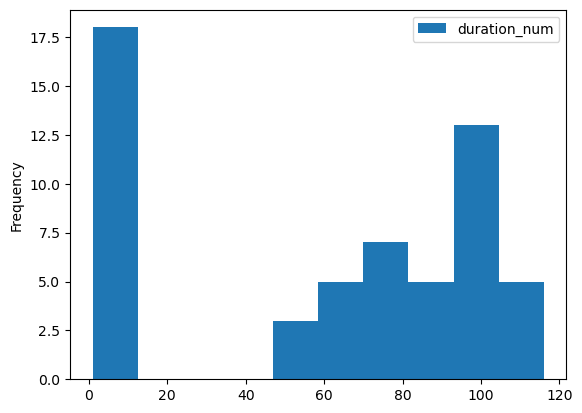

In [9]:
df[['title', 'country', 'duration_num']].loc[df['country'] == 'Argentina'].plot.hist()

<Axes: ylabel='Frequency'>

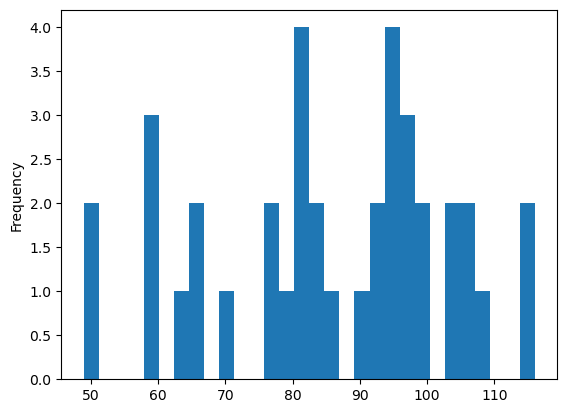

In [20]:
df.loc[(df['country'] == 'Argentina') & (df['type'] == 'Movie')]['duration_num'].plot.hist(bins=30)

In [21]:
# Count me da el número total de registros por columna
df.count()

show_id          8807
type             8807
title            8807
director         8807
cast             8807
country          8807
date_added       8807
release_year     8807
rating           8807
duration         8807
listed_in        8807
description      8807
duration_num     8807
duration_unit    8807
dtype: int64

In [22]:
# Quiero saber cuántas son esas películas de más de dos horas, usando count()
df.duration_num.loc[df['duration_num'] > 120].count()

1142

In [23]:
# Se pueden ordenar los datos
df[['show_id', 'type', 'title', 'country', 'release_year', 'duration']].sort_values(by='release_year', ascending=False)

,show_id,type,title,country,release_year,duration
693,s694,Movie,Ali & Ratu Ratu Queens,,2021,101 min
781,s782,Movie,Black Holes | The Edge of All We Know,,2021,99 min
762,s763,Movie,Sweet & Sour,South Korea,2021,103 min
763,s764,TV Show,Sweet Tooth,United States,2021,1 Season
764,s765,Movie,Trippin' with the Kandasamys,South Africa,2021,94 min
...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,61 min
8763,s8764,Movie,WWII: Report from the Aleutians,United States,1943,45 min
8205,s8206,Movie,The Battle of Midway,United States,1942,18 min
7790,s7791,Movie,Prelude to War,United States,1942,52 min


In [24]:
# Quiero saber el número de películas por año
# Además con el comando rename puedo definir el nombre de la columna nueva que se está agregando
df_temp = df.groupby('release_year').size().rename('movies').reset_index()
df_temp

,release_year,movies
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [25]:
# Veo los máximos
df_temp.max()

release_year    2021
movies          1147
dtype: int64

In [26]:
df_temp.max()['release_year']

2021

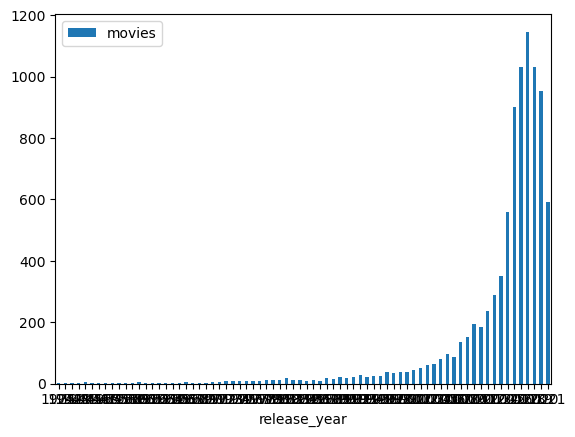

In [27]:
# Un gráfico simple - se verá más adelante:
import matplotlib.pyplot as plt
ax = df_temp.plot.bar(x='release_year', y='movies', rot=0)
plt.show()

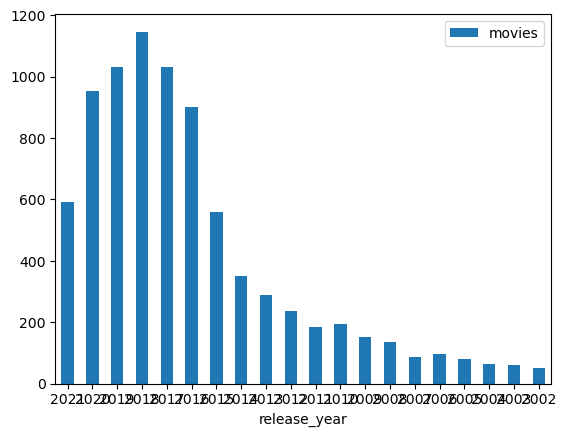

In [29]:
ax = df_temp.sort_values(by='release_year', ascending=False)[:20].plot.bar(x='release_year', y='movies', rot=0)
plt.show()

In [30]:
# Se guarda el archivo para usarlo en la sesión futura
df.to_csv('netflix_titles_2.csv')